
Problem Statement:
Due to recent revenue setbacks, Yulu wants to increase revenue by understanding the factors influencing the demand for their shared electric cycles, specifically in the Indian market.


In [ ]:
#Downloading Data
!gdown 1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i

Downloading...
From: https://drive.google.com/uc?id=1o94fXnmvrx6jRgI6S-SeZ3tfnKjCDY0i
To: /content/bike_sharing.csv
100% 648k/648k [00:00<00:00, 95.1MB/s]


In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1=pd.read_csv('bike_sharing.csv')

In [ ]:
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df1.shape


(10886, 12)

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
#Downloading Data

--2024-04-09 03:50:32--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.176, 108.157.172.10, 108.157.172.183, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089.1’

bike_sharing.csv?16 100%[===================>] 633.16K  --.-KB/s    in 0.09s   

2024-04-09 03:50:32 (7.14 MB/s) - ‘bike_sharing.csv?1642089089.1’ saved [648353/648353]



In [ ]:
df=pd.read_csv('bike_sharing.csv?1642089089')

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape
#shape of Data

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#making changes to datatypes as necessary
df['datetime']=pd.to_datetime(df['datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [ ]:

df['season'] = df['season'].astype('category')


In [ ]:
df['holiday'] = df['holiday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(4)
memory usage: 723.7 KB


In [ ]:
df['Year']=df.datetime.dt.year

In [ ]:
df['Year'].value_counts()

Year
2012    5464
2011    5422
Name: count, dtype: int64

In [ ]:
df['Month']=df.datetime.dt.month

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1


In [ ]:
#Missing Value Detection
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
Year          0
Month         0
dtype: int64

In [ ]:
#Check duplicates
df.duplicated().sum()

0

Observation:There are no missing values in the data.There are no duplicate records.

In [ ]:
#Univariate Analysis
#1.Season
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [ ]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [ ]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [ ]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
df['temp'].value_counts()

temp
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
0.82       7
38.54      7
39.36      6
2.46       5
1.64       2
41.00      1
Name: count, dtype: int64

In [ ]:
df['temp_bins']=pd.cut(df['temp'],bins=(0,10,19,25,33,41),labels=('very cold','cold','moderate','warm','hot'))

In [ ]:
df['temp_bins'].value_counts()

temp_bins
cold         3879
warm         3095
moderate     2250
very cold    1259
hot           403
Name: count, dtype: int64

In [ ]:
df['atemp'].value_counts()

atemp
31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
3.030       7
43.940      7
2.275       7
43.180      7
44.695      3
0.760       2
1.515       1
45.455      1
Name: count, dtype: int64

In [ ]:
df['atemp_bins']=pd.cut(df['atemp'],bins=(0,10,19,25,33,41),labels=('very cold','cold','moderate','warm','hot'))

In [ ]:
df['atemp_bins'].value_counts()

atemp_bins
warm         3204
cold         2840
moderate     2607
hot          1593
very cold     577
Name: count, dtype: int64

In [ ]:
df['humidity'].value_counts()

humidity
88    368
94    324
83    316
87    289
70    259
     ... 
8       1
10      1
97      1
96      1
91      1
Name: count, Length: 89, dtype: int64

In [ ]:
df['windspeed'].value_counts()

windspeed
0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
51.9987       1
50.0021       1
Name: count, dtype: int64

In [ ]:
df['Year'].value_counts()

Year
2012    5464
2011    5422
Name: count, dtype: int64

In [ ]:
df['Month'].value_counts()

Month
5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: count, dtype: int64

<Axes: xlabel='atemp_bins', ylabel='count'>

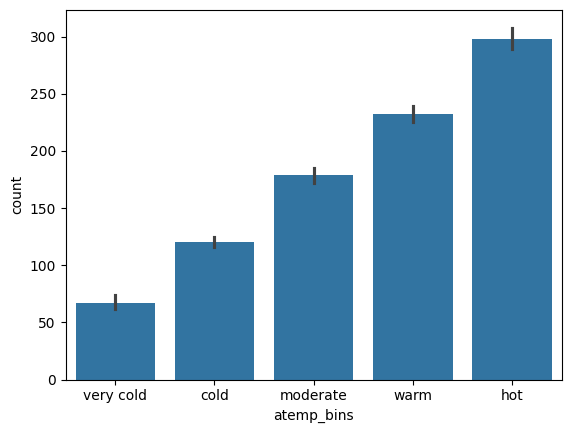

In [ ]:
sns.barplot(x='atemp_bins',y='count',data=df)

Creating two dataset one for each of the categorical coloumns and one for the numerical coloumns. Then plotting the countplot for categorical and histplot for the numerical.

In [ ]:
df_cat = df.select_dtypes(include=['category'])
df_cat

,season,holiday,workingday,weather,temp_bins,atemp_bins
0,1,0,0,1,very cold,cold
1,1,0,0,1,very cold,cold
2,1,0,0,1,very cold,cold
3,1,0,0,1,very cold,cold
4,1,0,0,1,very cold,cold
...,...,...,...,...,...,...
10881,4,0,1,1,cold,moderate
10882,4,0,1,1,cold,cold
10883,4,0,1,1,cold,cold
10884,4,0,1,1,cold,cold


In [ ]:
df_num=df.select_dtypes(include=np.number)
df_num.head()


,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month
0,9.84,14.395,81,0.0,3,13,16,2011,1
1,9.02,13.635,80,0.0,8,32,40,2011,1
2,9.02,13.635,80,0.0,5,27,32,2011,1
3,9.84,14.395,75,0.0,3,10,13,2011,1
4,9.84,14.395,75,0.0,0,1,1,2011,1


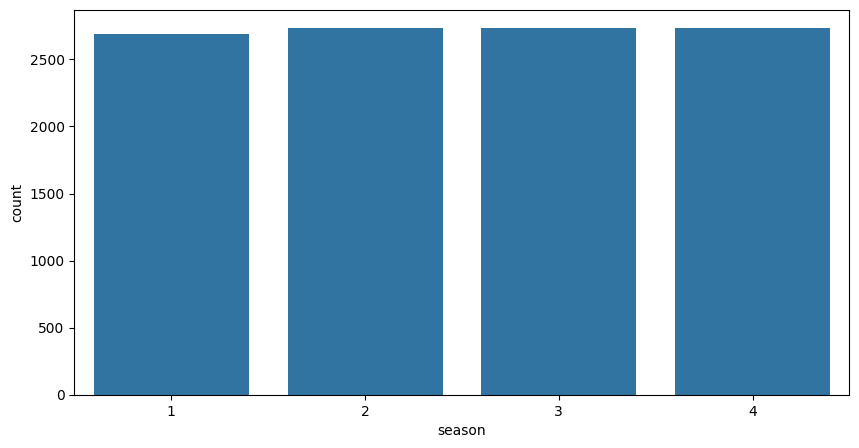

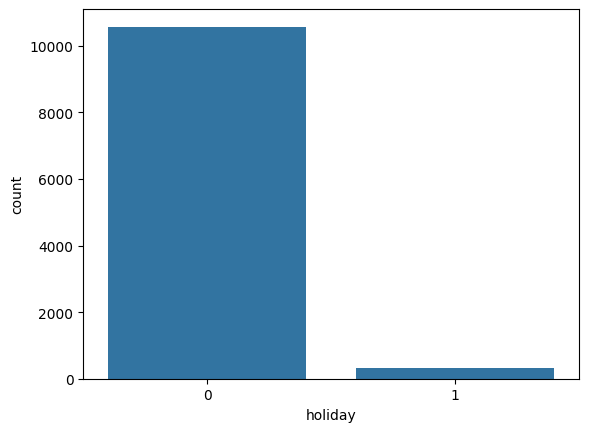

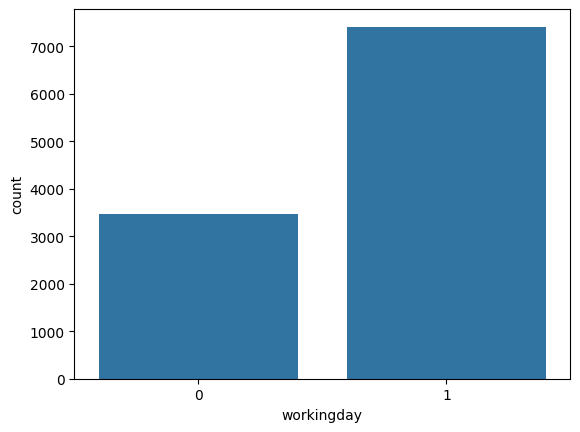

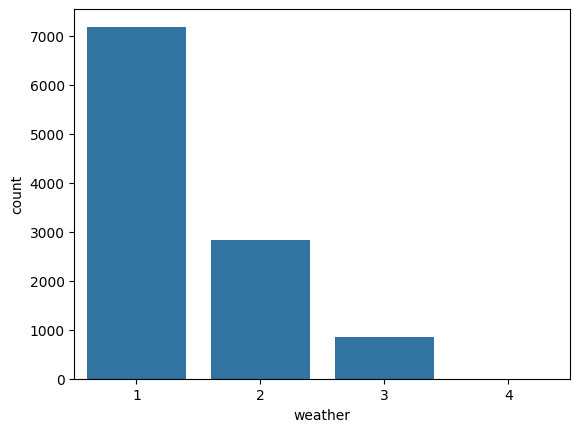

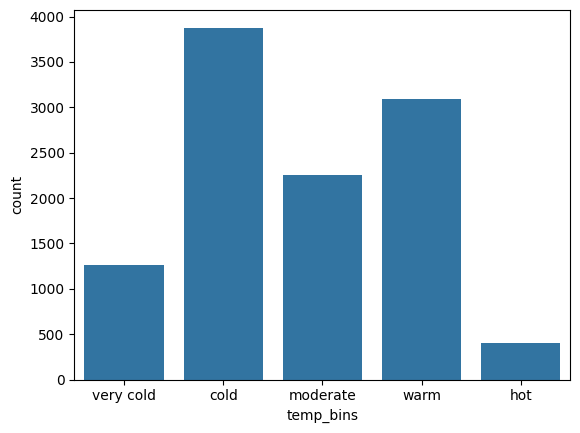

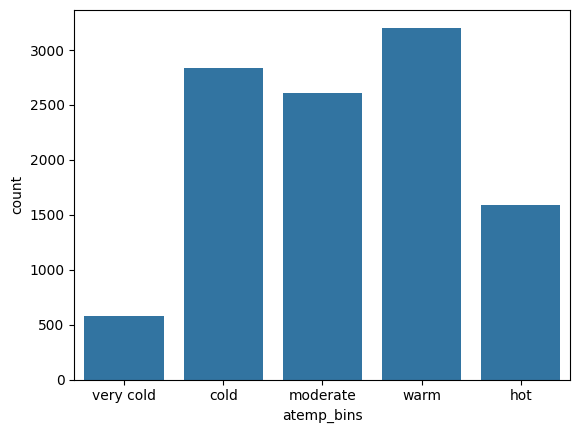

In [ ]:
#Countplot for Categorical Variables
fig = plt.figure(figsize = (10,5))
for col in enumerate(df_cat):
    sns.countplot(x=col[1],data=df_cat)
    plt.show()

Inference:
•	There are almost similar number of values for each of the seasons of spring,summer,fall and winter. Least number of values is in spring.
•	The countplot shows there are more data from those days which are not holidays.
•	There are more weekdays than weekend in the data provided.
•	There are more days with clear skies and good weather while harsh weather data is very low only 1 value.
•	There are more cold days(10-19 degree C) with hot days(33-41 degree C) few in number


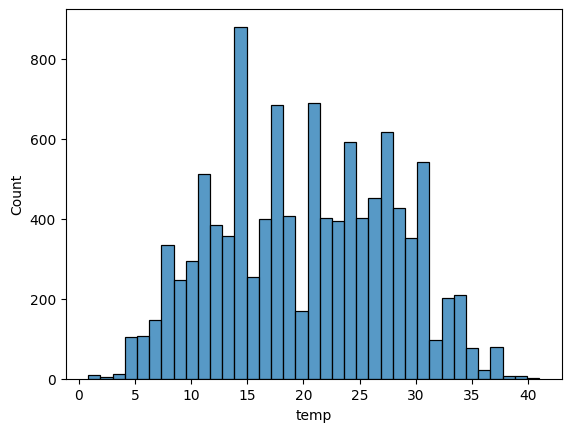

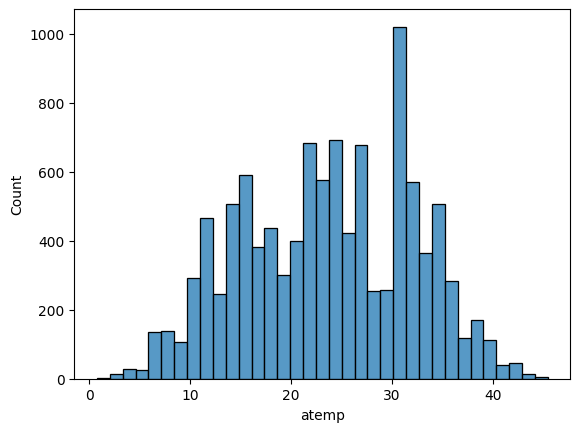

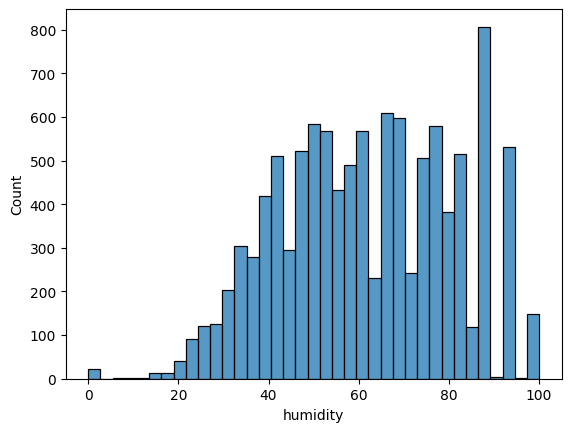

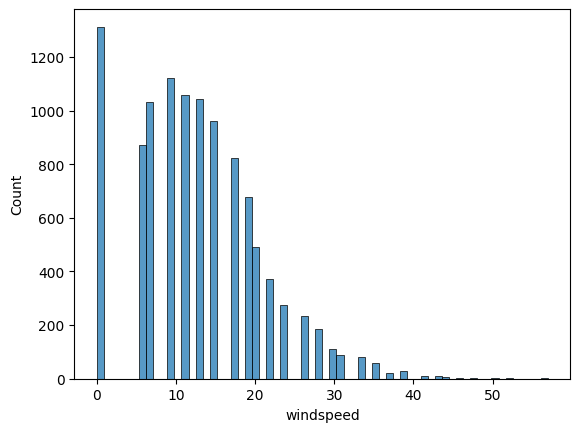

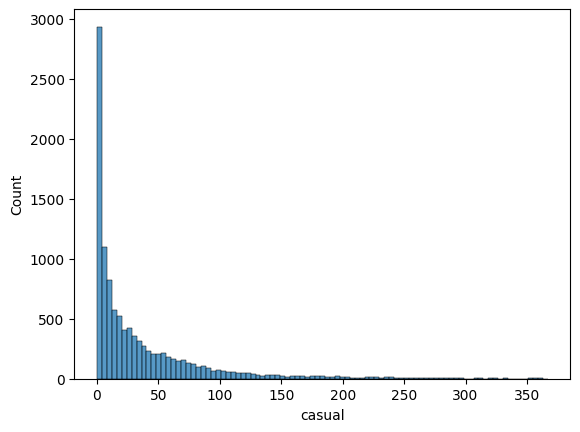

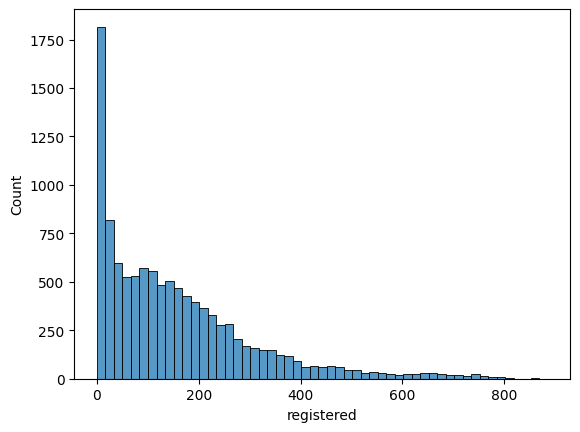

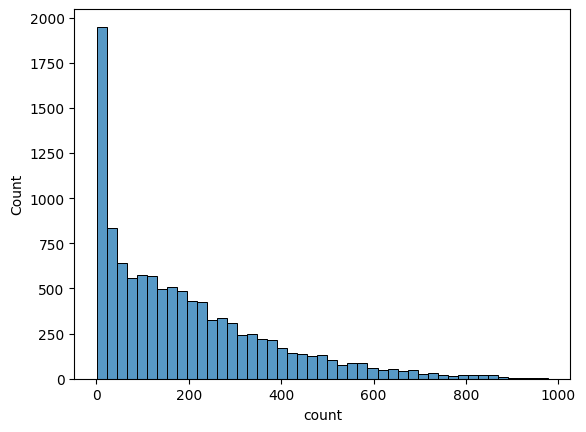

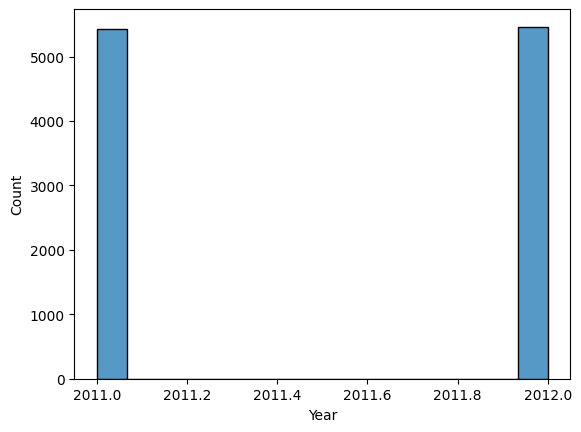

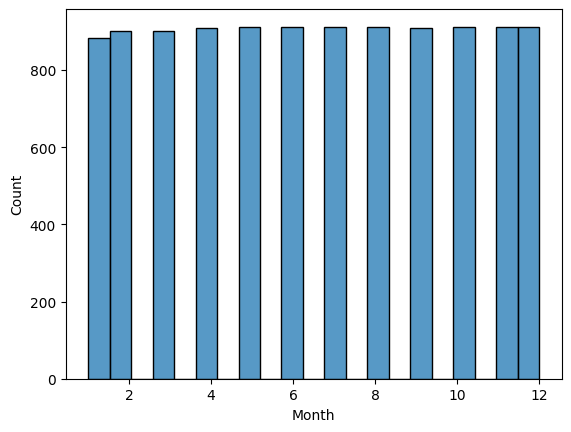

In [ ]:
#Histplot for numerical variables
for col in enumerate(df_num):
    sns.histplot(x=col[1],data=df_num)
    plt.show()

Inference:
•	The histplot of temperature shows a normal distribution.
•	Atemp also has a distribution similar to temperature.
•	The humidity is between 0-100 with greater number of values 80-90.
•	The windspeed varies from 0 -55 with histogram having a right skew.
•	The two years during which data is collected is 2011 and 2012. Almost similar number of values are present.


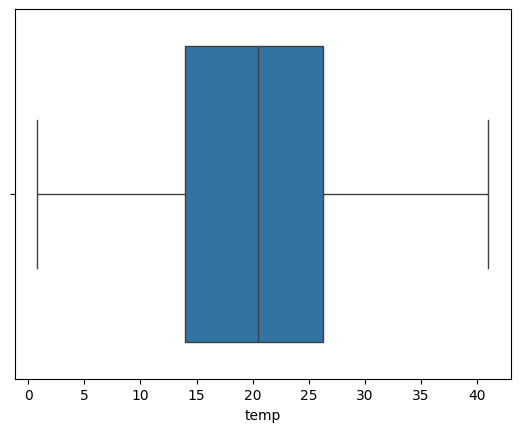

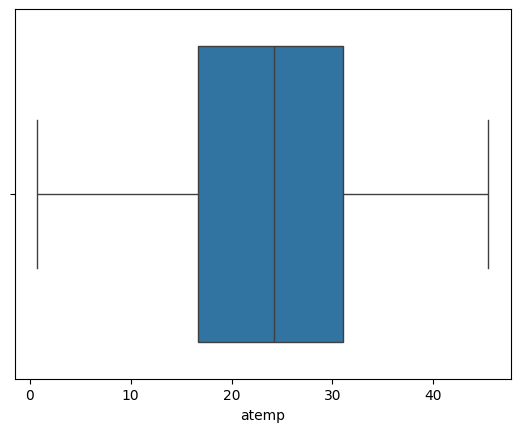

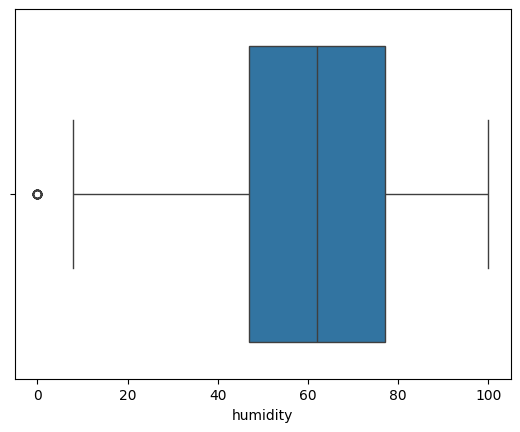

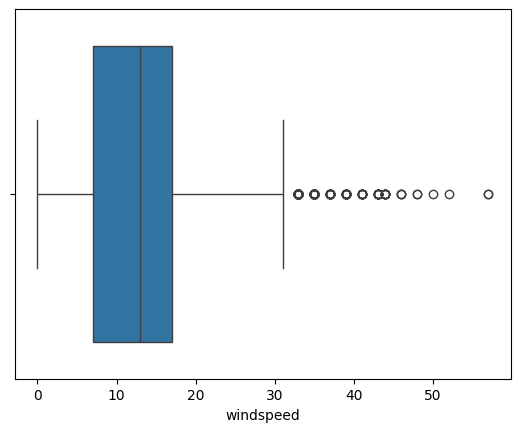

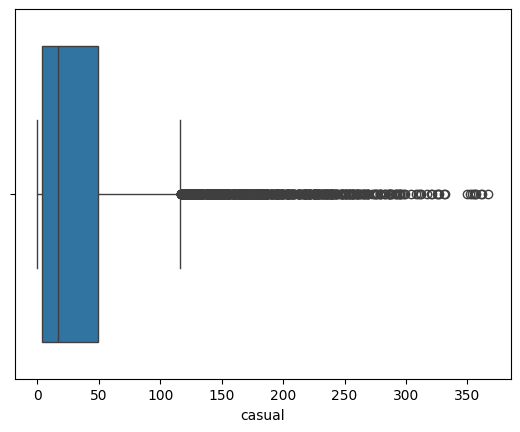

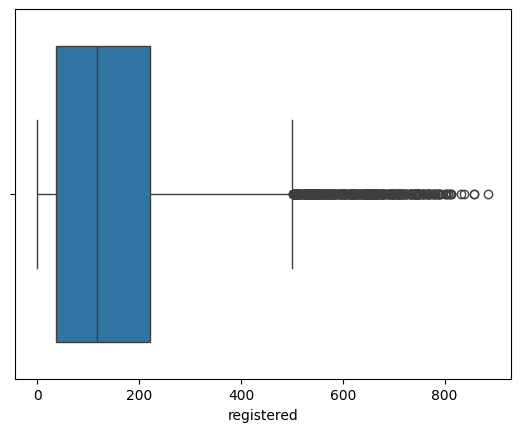

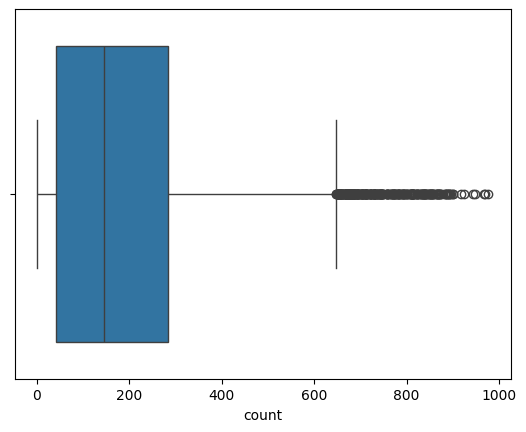

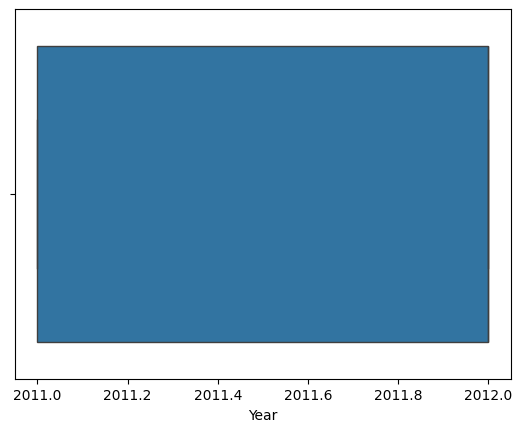

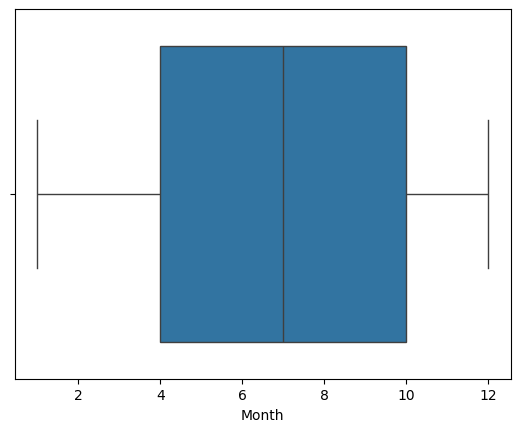

In [ ]:
#Outliers and Boxplot
for col in enumerate(df_num):
    sns.boxplot(x=col[1],data=df_num)
    plt.show()

Inference:
•	There are no outliers in temp.
•	There is one outlier at 0 humidity.
•	The windspeed greater than 30 are the outliers and can be seen in the box plot.
•	For the count of bicycles there are huge number of outlliers on the right side. Values greater than 647.
•	 For our analysis sake we are not removing any outliers as there may impact the outcome.


In [ ]:
#Outlier Detection and IQR
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


temp           12.3000
atemp          14.3950
humidity       30.0000
windspeed       9.9964
casual         45.0000
registered    186.0000
count         242.0000
Year            1.0000
Month           6.0000
dtype: float64


In [ ]:
lower_limit=Q1-1.5*IQR
lower_limit

temp            -4.5100
atemp           -4.9275
humidity         2.0000
windspeed       -7.9931
casual         -63.5000
registered    -243.0000
count         -321.0000
Year          2009.5000
Month           -5.0000
dtype: float64

In [ ]:
upper_limit=Q3 + 1.5*IQR
upper_limit

temp            44.6900
atemp           52.6525
humidity       122.0000
windspeed       31.9925
casual         116.5000
registered     501.0000
count          647.0000
Year          2013.5000
Month           19.0000
dtype: float64

In [ ]:
#The values less than lower limit and higher than upper limit are the outliers.

In [ ]:
Q1

temp            13.9400
atemp           16.6650
humidity        47.0000
windspeed        7.0015
casual           4.0000
registered      36.0000
count           42.0000
Year          2011.0000
Month            4.0000
Name: 0.25, dtype: float64

In [ ]:
# Filtering Data without outliers in case required
df1, lower_limit=df1.align(lower_limit, axis=1, copy=False)

In [ ]:
df1, upper_limit=df1.align(upper_limit, axis=1, copy=False)

In [ ]:
df1_iqr=df[~((df1 < lower_limit)|(df1 > upper_limit)).any(axis=1)]

In [ ]:
df1_iqr.shape

(9518, 16)

In [ ]:
df1.shape

(10886, 14)

In [ ]:
df1.head()

,Month,Year,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,NaN,NaN,14.395,3,16,2011-01-01 00:00:00,0,81,13,1,9.84,1,0.0,0
1,NaN,NaN,13.635,8,40,2011-01-01 01:00:00,0,80,32,1,9.02,1,0.0,0
2,NaN,NaN,13.635,5,32,2011-01-01 02:00:00,0,80,27,1,9.02,1,0.0,0
3,NaN,NaN,14.395,3,13,2011-01-01 03:00:00,0,75,10,1,9.84,1,0.0,0
4,NaN,NaN,14.395,0,1,2011-01-01 04:00:00,0,75,1,1,9.84,1,0.0,0


In [ ]:

# Here we are not removing the outliers, hence we will use the entire data for our analysis

<Axes: xlabel='season', ylabel='count'>

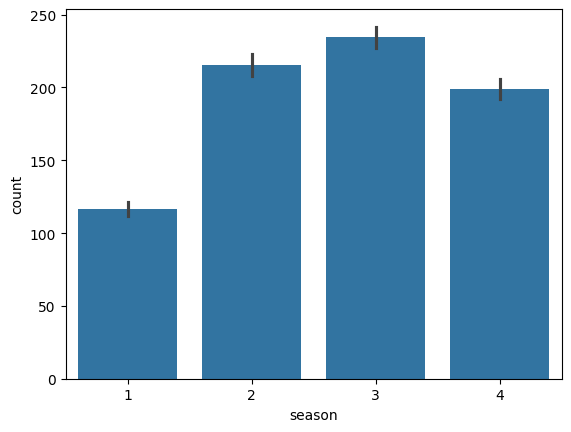

In [ ]:
#Bivariate Analysis
sns.barplot(x='season',y='count',data=df)

<Axes: xlabel='weather', ylabel='count'>

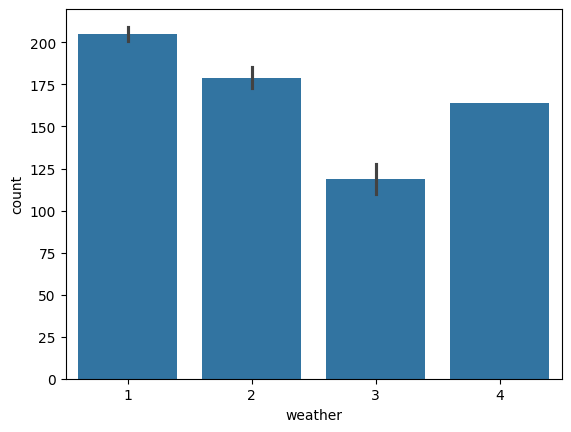

In [ ]:
sns.barplot(x='weather',y='count',data=df)

<Axes: xlabel='workingday', ylabel='count'>

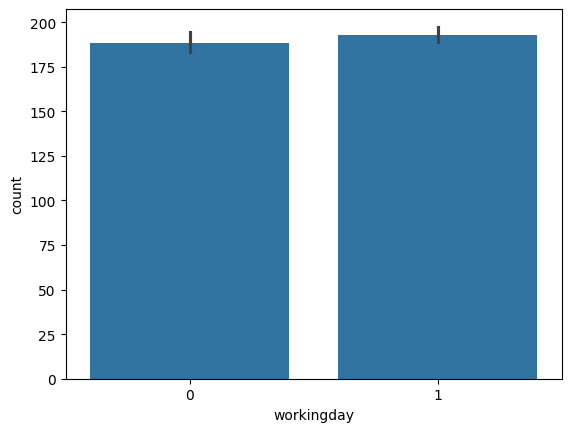

In [ ]:
sns.barplot(x='workingday',y='count',data=df)

<Axes: xlabel='holiday', ylabel='count'>

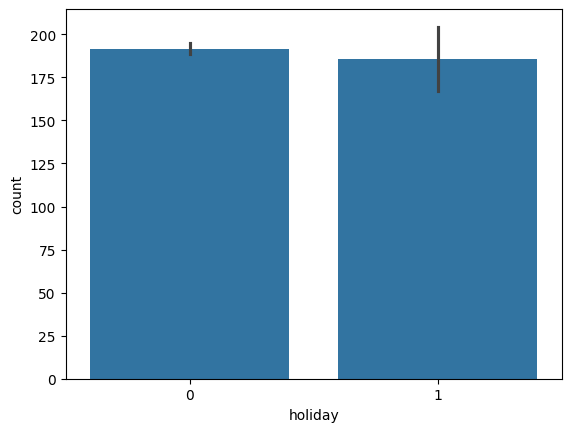

In [ ]:
sns.barplot(x='holiday',y='count',data=df)

<Axes: xlabel='humidity', ylabel='count'>

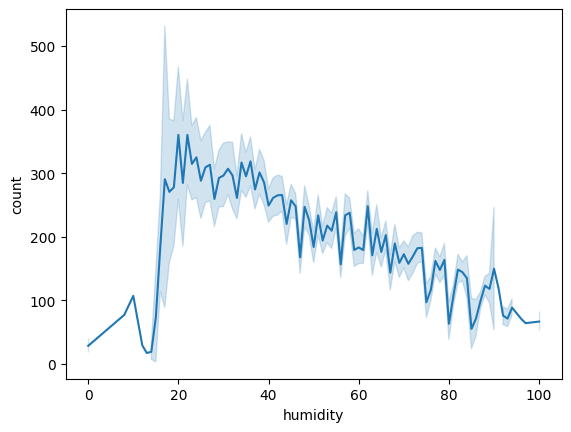

In [ ]:
sns.lineplot(x='humidity',y='count',data=df)

<Axes: xlabel='temp', ylabel='count'>

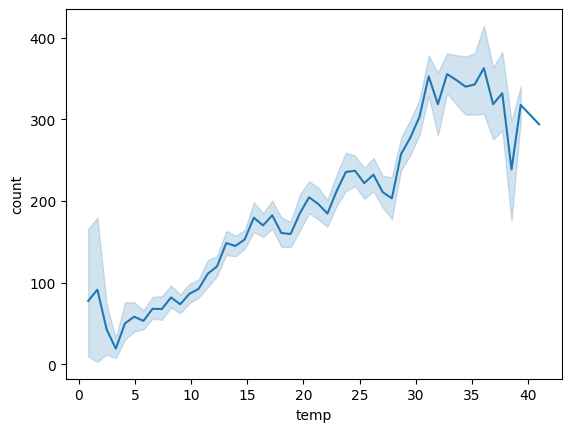

In [ ]:
sns.lineplot(x='temp',y='count',data=df)

<Axes: xlabel='windspeed', ylabel='count'>

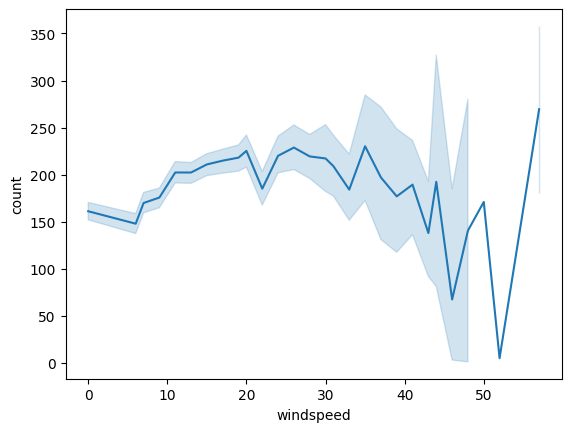

In [ ]:
sns.lineplot(x='windspeed',y='count',data=df)

Inference:
•	There is not much difference in the number of cycles taken on working day vs holiday.
•	Humidity around 20 has the highest number of cycles which gradually decreases as humidity increases.
•	The usage of cycles increase with increasing temperature and kind of becomes constant around 30-40 then again decreases.
•	Lower windspeeds favor more cycles but greater speeds than 50 causes decrease in usage of cycle.


<Axes: xlabel='windspeed', ylabel='count'>

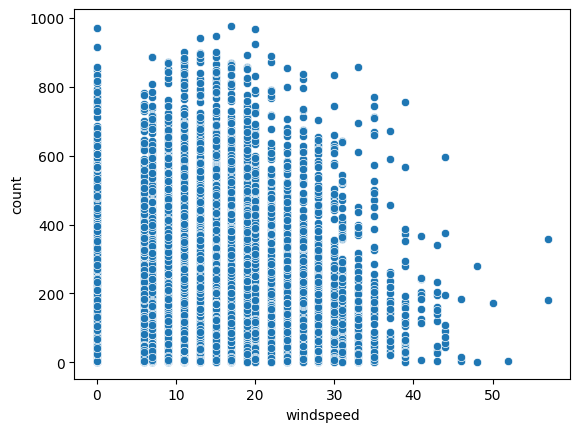

In [ ]:
sns.scatterplot(x='windspeed',y='count',data=df)

<Axes: xlabel='Month', ylabel='count'>

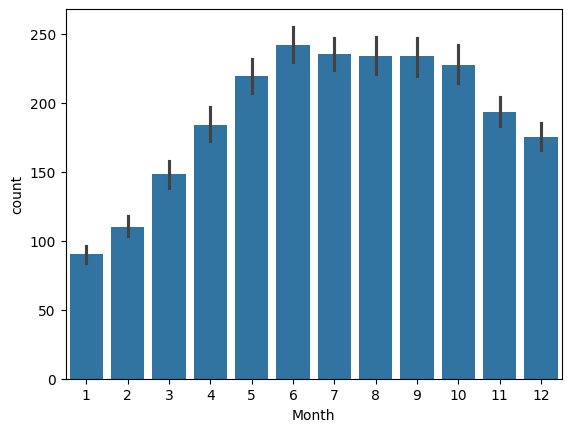

In [ ]:
sns.barplot(data=df,x='Month',y='count')

Inference:
Looking at the data for different months we can see maximum usage in the month of June and higher usage in July,August,September. Low usage in January ,February.


<Axes: xlabel='Year', ylabel='count'>

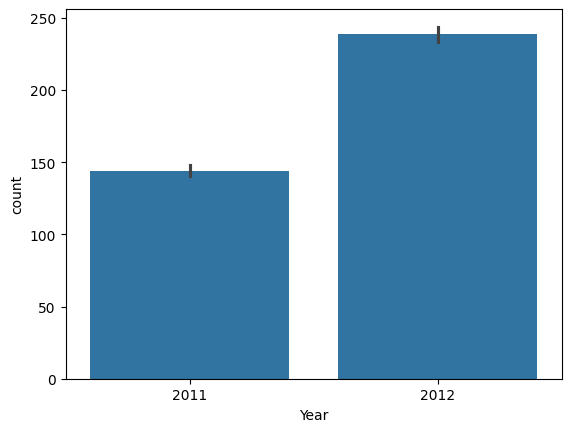

In [ ]:
#There has been growth in the number of bicycles from 2011 -2012.
sns.barplot(data=df,x='Year',y='count')

In [ ]:
df.groupby('Year')['count'].sum()

Year
2011     781979
2012    1303497
Name: count, dtype: int64

In [ ]:
df['count'].sum()

2085476

In [ ]:
(1303497-781979)/781979

0.6669207229350149

In [ ]:
df[df['windspeed']>50]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,temp_bins,atemp_bins
760,2011-02-15 01:00:00,1,0,1,1,12.30,12.12,42,51.9987,0,5,5,2011,2,cold,cold
868,2011-02-19 15:00:00,1,0,0,1,18.04,21.97,16,50.0021,84,87,171,2011,2,cold,moderate
2755,2011-07-03 17:00:00,3,0,0,3,32.80,37.12,49,56.9969,181,177,358,2011,7,warm,hot
2756,2011-07-03 18:00:00,3,0,0,3,32.80,37.12,49,56.9969,74,107,181,2011,7,warm,hot


In [ ]:
df[df['count']>250]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,temp_bins,atemp_bins
743,2011-02-14 08:00:00,1,0,1,1,15.58,19.695,40,31.0009,7,249,256,2011,2,cold,moderate
798,2011-02-16 17:00:00,1,0,1,1,18.86,22.725,28,19.0012,11,244,255,2011,2,cold,moderate
813,2011-02-17 08:00:00,1,0,1,1,13.12,16.665,57,6.0032,18,267,285,2011,2,cold,cold
822,2011-02-17 17:00:00,1,0,1,2,23.78,27.275,32,19.9995,18,256,274,2011,2,moderate,warm
837,2011-02-18 08:00:00,1,0,1,2,17.22,21.210,77,12.9980,26,246,272,2011,2,cold,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10871,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,317,2012,12,cold,cold
10878,2012-12-19 16:00:00,4,0,1,1,17.22,21.210,50,23.9994,37,297,334,2012,12,cold,moderate
10879,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,562,2012,12,cold,moderate
10880,2012-12-19 18:00:00,4,0,1,1,15.58,19.695,50,23.9994,23,546,569,2012,12,cold,moderate


<Axes: xlabel='temp_bins', ylabel='count'>

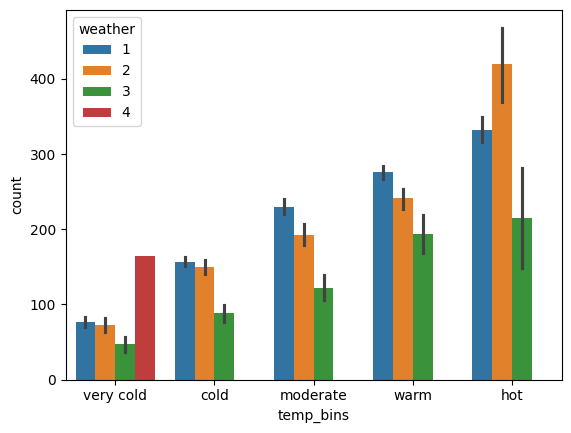

In [ ]:
#Multivariate
sns.barplot(x='temp_bins',y='count',hue='weather',data=df)

Inference:

There is higher number of cycles as temperature increases and better weather also makes it preferrable to use cycle.


In [ ]:
df_corr=df1

In [ ]:
df_corr.columns

Index(['Month', 'Year', 'atemp', 'casual', 'count', 'datetime', 'holiday',
       'humidity', 'registered', 'season', 'temp', 'weather', 'windspeed',
       'workingday'],
      dtype='object')

In [ ]:
df_corr.drop(['datetime','Year','Month'],axis=1,inplace=True)
df_corr.head()


,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3,16,0,81,13,1,9.84,1,0.0,0
1,13.635,8,40,0,80,32,1,9.02,1,0.0,0
2,13.635,5,32,0,80,27,1,9.02,1,0.0,0
3,14.395,3,13,0,75,10,1,9.84,1,0.0,0
4,14.395,0,1,0,75,1,1,9.84,1,0.0,0


In [ ]:
corr_data=df_corr.corr()
corr_data

,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday
atemp,1.000000,0.462067,0.389784,-0.005215,-0.043536,0.314635,0.264744,0.984948,-0.055376,-0.057473,0.024660
casual,0.462067,1.000000,0.690414,0.043799,-0.348187,0.497250,0.096758,0.467097,-0.135918,0.092276,-0.319111
count,0.389784,0.690414,1.000000,-0.005393,-0.317371,0.970948,0.163439,0.394454,-0.128655,0.101369,0.011594
holiday,-0.005215,0.043799,-0.005393,1.000000,0.001929,-0.020956,0.029368,0.000295,-0.007074,0.008409,-0.250491
humidity,-0.043536,-0.348187,-0.317371,0.001929,1.000000,-0.265458,0.190610,-0.064949,0.406244,-0.318607,-0.010880
registered,0.314635,0.497250,0.970948,-0.020956,-0.265458,1.000000,0.164011,0.318571,-0.109340,0.091052,0.119460
season,0.264744,0.096758,0.163439,0.029368,0.190610,0.164011,1.000000,0.258689,0.008879,-0.147121,-0.008126
temp,0.984948,0.467097,0.394454,0.000295,-0.064949,0.318571,0.258689,1.000000,-0.055035,-0.017852,0.029966
weather,-0.055376,-0.135918,-0.128655,-0.007074,0.406244,-0.109340,0.008879,-0.055035,1.000000,0.007261,0.033772
windspeed,-0.057473,0.092276,0.101369,0.008409,-0.318607,0.091052,-0.147121,-0.017852,0.007261,1.000000,0.013373


<Axes: >

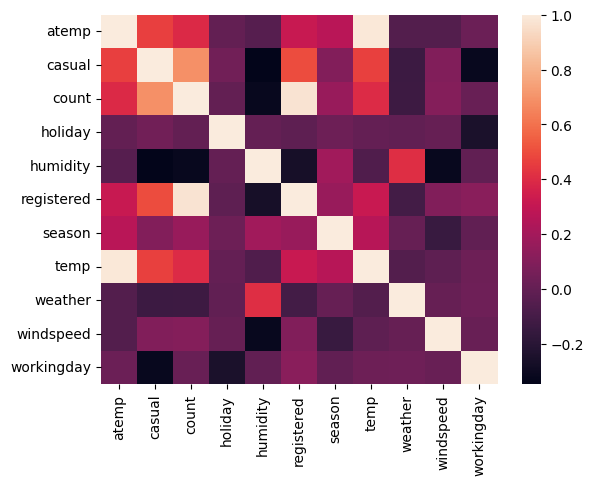

In [ ]:
sns.heatmap(data=corr_data)

Inference:
From the heat map we can see there is higher correlation for count with season and temperature.


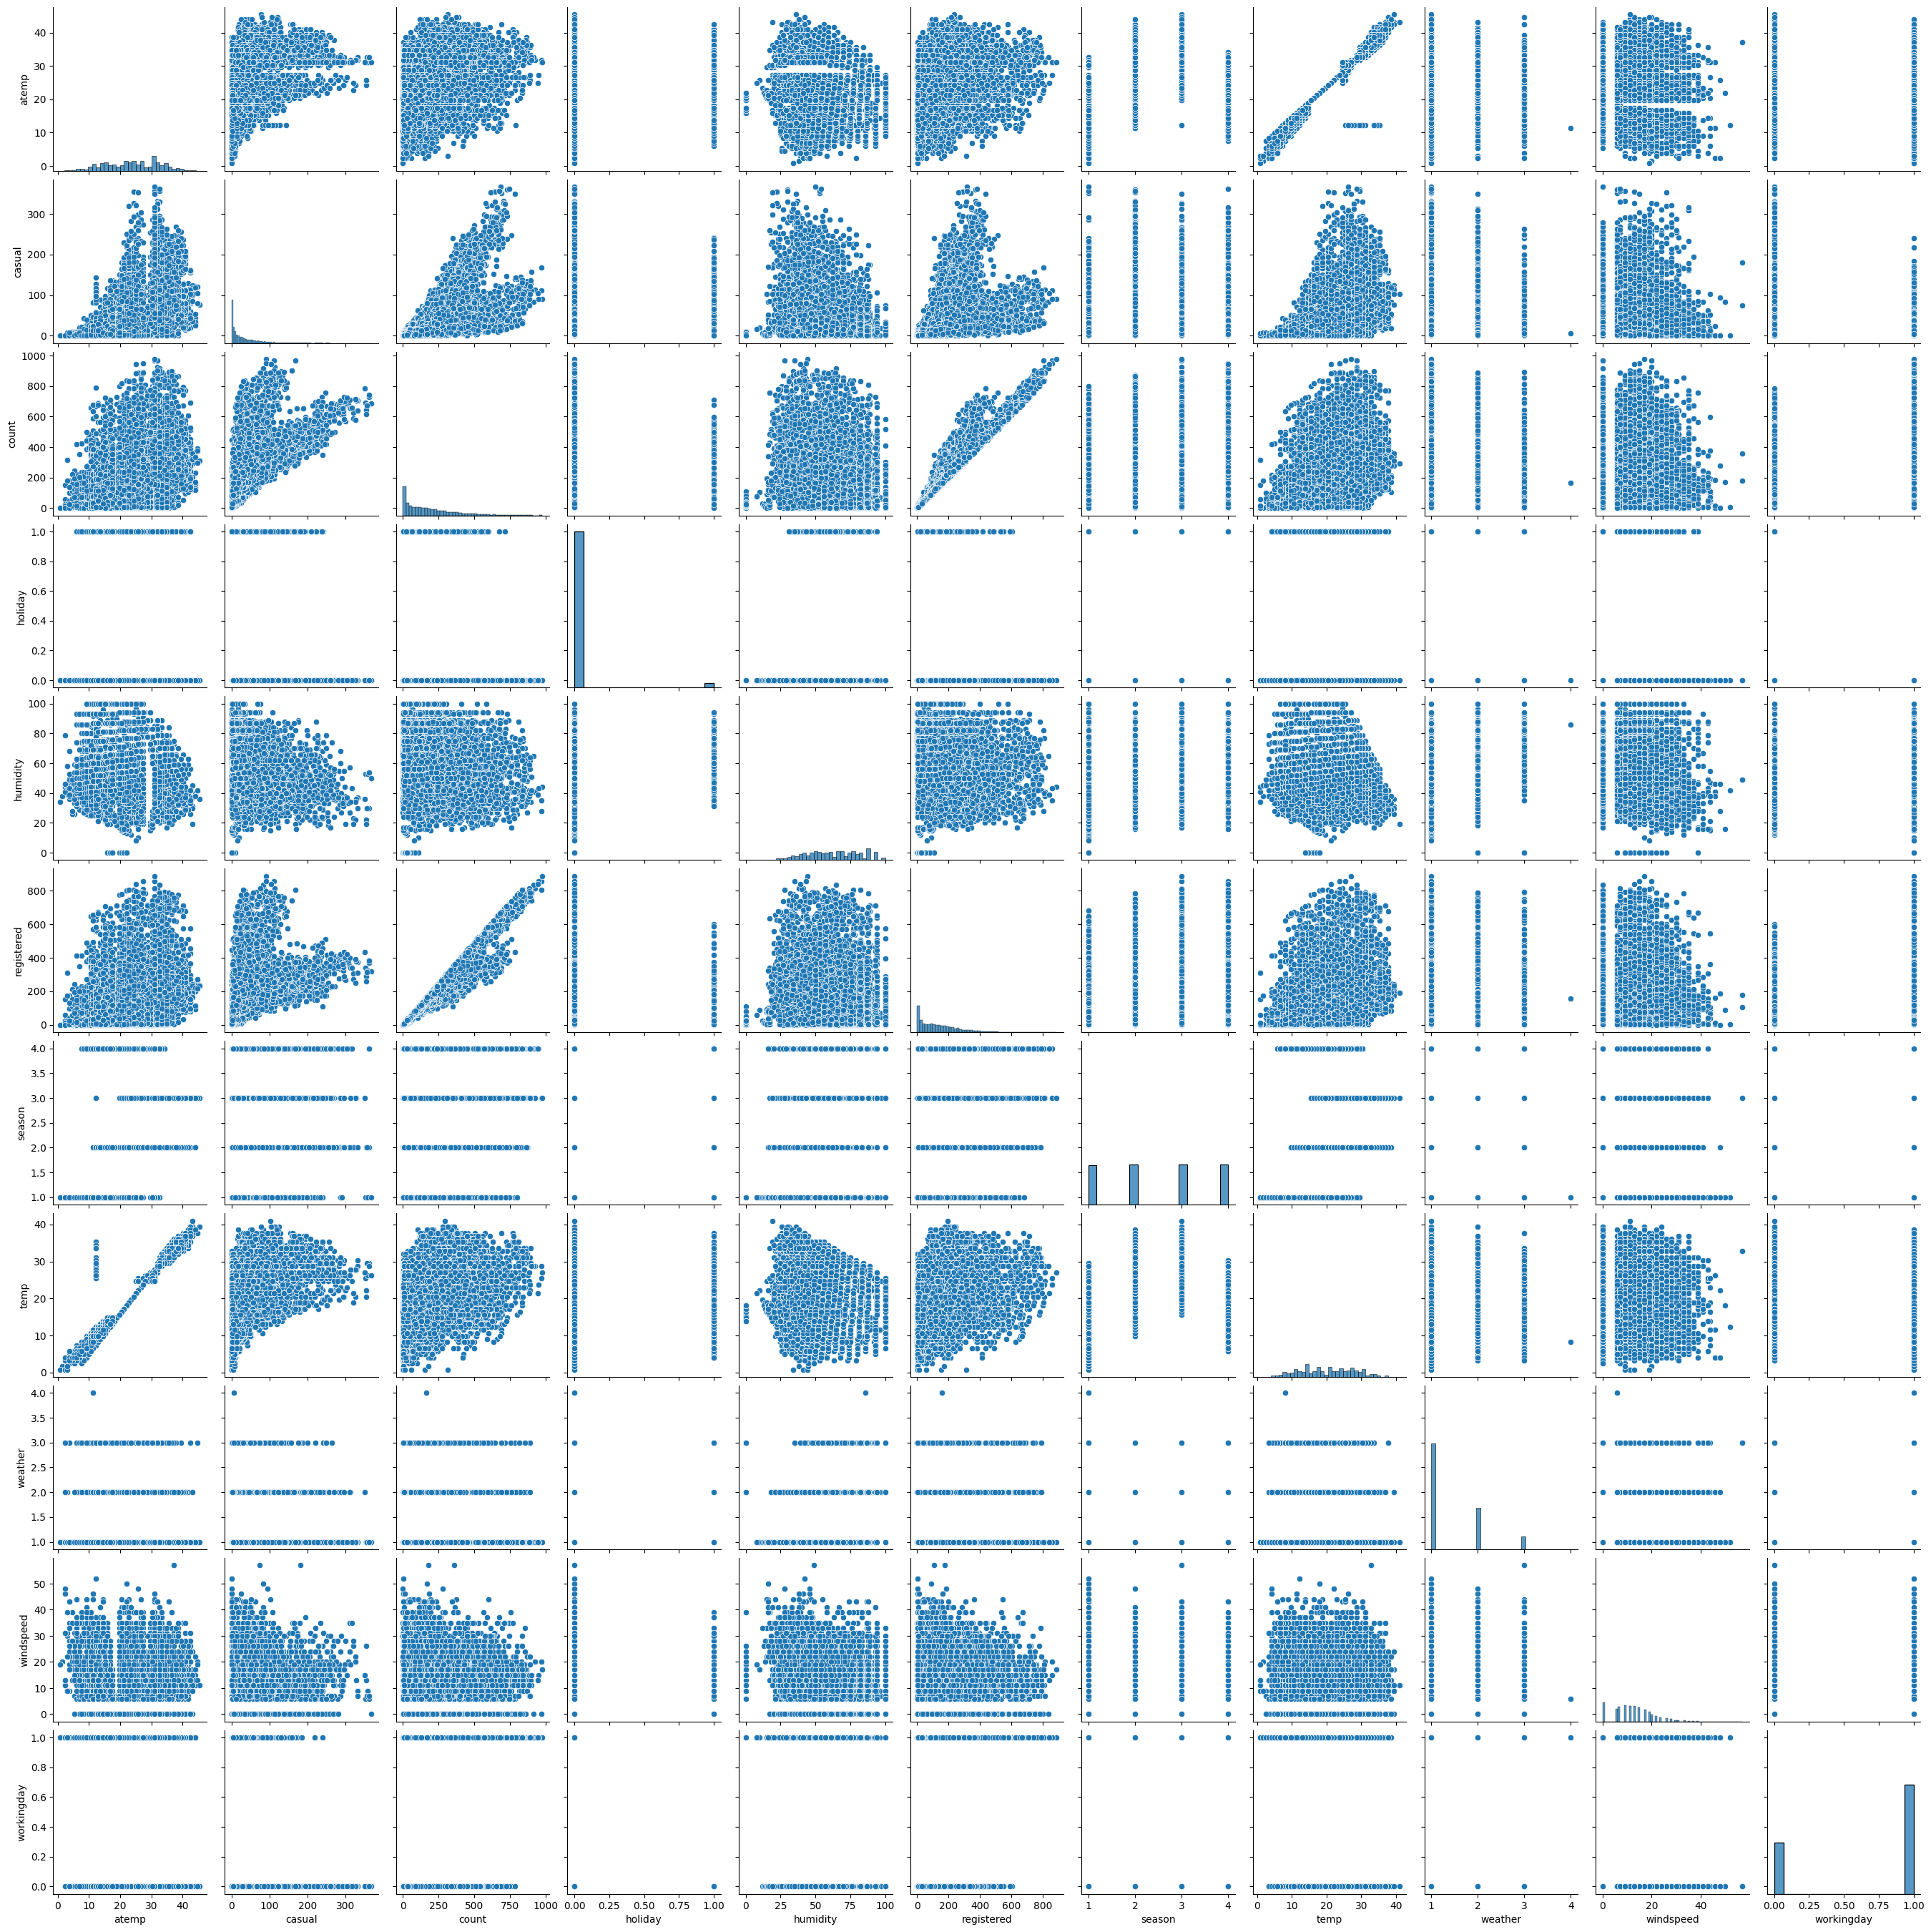

In [ ]:
sns.pairplot(df_corr)
plt.show()

In [ ]:
# Hypothesis Testing

#2- Sample T-Test to check if Working Day has an effect on the number of electric cycles rented .





a)	Test to check if Working Day has an effect on the number of electric cycles rented .

We will check if there is significant difference between the no. of bike rides on Weekdays and Weekends.

Null Hypothesis (H0): There is no significant difference in the no. of bike rides taken on Weekdays and Weekends

Alternate Hypothesis (H1) : There is significant difference in the no. of bike rides taken on Weekdays and Weekends

Test:
We will use a 2 sample Independent T test.
Significance level=0.05


In [ ]:
from scipy.stats import ttest_ind

In [ ]:
df_workday_count=df[df['workingday']==1]['count']
df_weekend_count=df[df['workingday']==0]['count']

In [ ]:
df_workday_count

47         5
48         2
49         1
50         3
51        30
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7412, dtype: int64

In [ ]:
df_weekend_count

0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: count, Length: 3474, dtype: int64

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,temp_bins,atemp_bins
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,very cold,cold
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,very cold,cold
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,very cold,cold
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,very cold,cold
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,very cold,cold


In [ ]:
t_stat, pvalue = ttest_ind(df_workday_count, df_weekend_count)

alpha = 0.05 # 95% confidence
if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Fail to Reject H0


In [ ]:
print(pvalue,",",t_stat)

0.22644804226361348 , 1.2096277376026694


In [ ]:
#Conclusion :There is no significant difference between number of bike rides taken on weekend/holidays and working days.

b)ANNOVA to check if No. of cycles rented is similar or different in different **1. weather.**
1.Weather:
Null Hypothesis (H0): There is no significant difference in the mean number of bike rides taken during different weather conditions(mu1=mu2=mu3=mu4)

Alternate Hypothesis (H1) : There is significant difference in the mean between one or more group.

There are 4 different types of weather conditions bein considered.Since there are more than two samples and only only categorical value along with the numerical value,we will use One way Anova.
Significance level:0.05

To be able to do anova we need to check for the conditions:
Normality
Equal Variance between groups

In [ ]:
from scipy.stats import f_oneway
from scipy.stats import kruskal

<Axes: xlabel='count', ylabel='Count'>

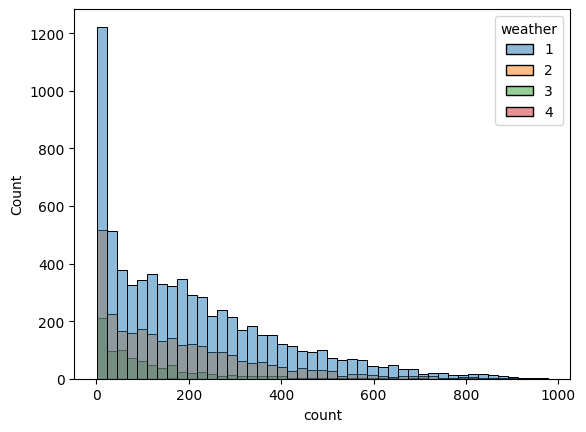

In [ ]:
# Normality test
Count=df['count']
sns.histplot(data=df,x='count',hue='weather')


In [ ]:
from statsmodels.graphics.gofplots import qqplot

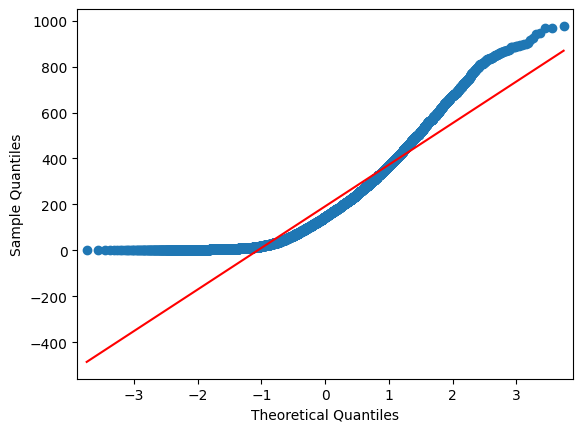

In [ ]:
qqplot(Count, line = "s")
plt.show()

In [ ]:
#Both Histogram and Shapiro show a right skew

In [ ]:
np.random.sample(42)
count_subset = Count.sample(100)

In [ ]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(count_subset)
print(p_value)

1.1395354881926778e-08


In [ ]:
#H0: Data is Gaussian
#Ha: Data is not Gaussian

if p_value < 0.05:
  print("Reject H0")
else:
  print("Failed to Reject H0")

Reject H0


In [ ]:
#Levene's test

In [ ]:
weather1_count=df[df['weather']==1]['count']
weather2_count=df[df['weather']==2]['count']
weather3_count=df[df['weather']==3]['count']
weather4_count=df[df['weather']==4]['count']

In [ ]:
from scipy.stats import levene

#H0: Variances are equal
#Ha: Variances are not equal

levene_stat, p_value = levene(weather1_count,weather2_count,weather3_count,weather4_count)
print(p_value)

if p_value < 0.05:
  print("Reject H0: Variances are not equal")

3.504937946833238e-35
Reject H0: Variances are not equal


In [ ]:
weather4_count

5631    164
Name: count, dtype: int64

In [ ]:
# Even though all the assumptions for Anova have failed we still go ahead with the Anova test.
#Anova Test
# H0: All groups have same mean
# Ha: One or more groups have different mean

f_stats, p_value = f_oneway(weather1_count, weather2_count, weather3_count,weather4_count)

if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Reject H0


In [ ]:
# Conclusion:There is significant difference in the number of bikes taken during  different weather conditions.

In [ ]:
f_stats, p_value

(65.53024112793271, 5.482069475935669e-42)

In [ ]:
kruskal(weather1_count, weather2_count, weather3_count,weather4_count)

KruskalResult(statistic=205.00216514479087, pvalue=3.501611300708679e-44)

In [ ]:
# Since the assumptions of Anova fail we can do Kruskal Wallis test , here also p value is lower than alpha so we reject null hypothesis.

b)ANNOVA to check if No. of cycles rented is similar or different in different **Season.**
 Null Hypothesis (H0): There is no significant difference in the mean number of bike rides taken during different seasons(mu1=mu2=mu3=mu4)

Alternate Hypothesis (H1) : There is significant difference in the mean between one or more groups.

There are 4 different seasons being considered.Since there are more than two samples and only only categorical value along with the numerical value,we will use One way Anova. Significance level:0.05

To be able to do anova we need to check for the conditions: Normality Equal Variance between groups

<Axes: xlabel='count', ylabel='Count'>

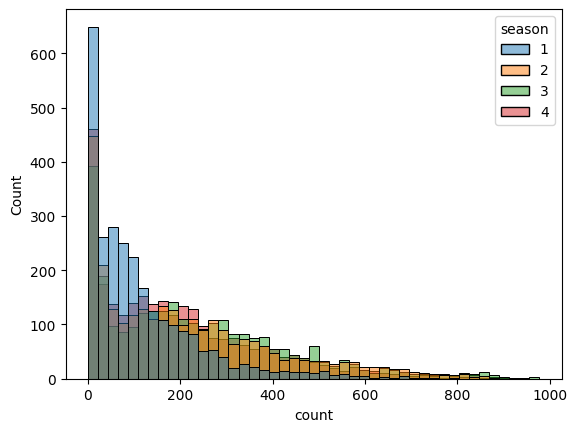

In [ ]:
# Normality test
Count=df['count']
sns.histplot(data=df,x='count',hue='season')


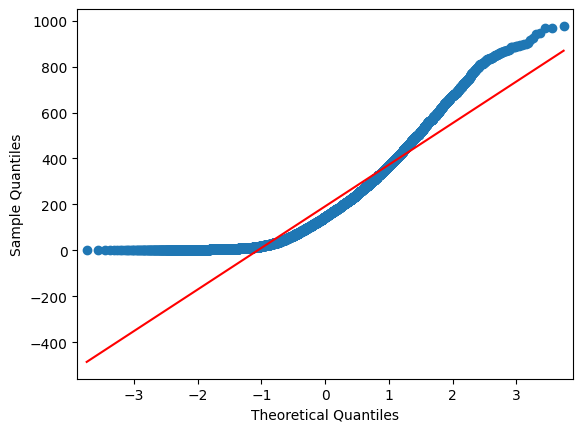

In [ ]:
qqplot(Count, line = "s")
plt.show()

In [ ]:
#Both Histogram and Shapiro show a right skew

In [ ]:
np.random.sample(42)
count_subset = Count.sample(100)

In [ ]:
from scipy.stats import shapiro
test_stat, p_value = shapiro(count_subset)
print(p_value)

7.633735208401049e-07


In [ ]:
#H0: Data is Gaussian
#Ha: Data is not Gaussian

if p_value < 0.05:
  print("Reject H0")
else:
  print("Failed to Reject H0")

Reject H0


In [ ]:
#Levene's test
season1_count=df[df['season']==1]['count']
season2_count=df[df['season']==2]['count']
season3_count=df[df['season']==3]['count']
season4_count=df[df['season']==4]['count']

In [ ]:
from scipy.stats import levene

#H0: Variances are equal
#Ha: Variances are not equal

levene_stat, p_value = levene(season1_count,season2_count,season3_count,season4_count)
print(p_value)

if p_value < 0.05:
  print("Reject H0: Variances are not equal")

1.0147116860043298e-118
Reject H0: Variances are not equal


In [ ]:
# Even though all the assumptions for Anova have failed we still go ahead with the Anova test.
#Anova Test
# H0: All groups have same mean
# Ha: One or more groups have different mean

f_stats, p_value = f_oneway(season1_count, season2_count, season3_count,season4_count)

if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")
    print("All groups have same mean")

Reject H0


In [ ]:
f_stats, p_value

(236.94671081032106, 6.164843386499654e-149)

In [ ]:
# Conclusion:There is significant different in the number of bikes taken during  different seasons.

In [ ]:
#Kruskal Wallis test
kruskal(season1_count, season2_count, season3_count,season4_count)

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)

In [ ]:
# Since the assumptions of Anova fail we can do Kruskal Wallis test , here also p value is lower than alpha so we reject null hypothesis.

c)Chi-square test to check if Weather is dependent on the season.
 We need to check Weather conditions are significantly different during different Seasons.
 Null Hypothesis:H0 Weather and Season is independent
 Alternate   Hypothesis(Ha): Weather is dependent on Season.

 For this we will use the Chi2 Contingency test for Independence

In [ ]:
 val = pd.crosstab(index=df["weather"], columns=df["season"]).values
 print(val)

[[1759 1801 1930 1702]
 [ 715  708  604  807]
 [ 211  224  199  225]
 [   1    0    0    0]]


In [ ]:
pd.crosstab(index=df["weather"], columns=df["season"])

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi_stat, p_value, df, exp_freq = chi2_contingency(val)

In [ ]:
chi_stat, p_value

(49.15865559689363, 1.5499250736864862e-07)

In [ ]:
if p_value < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')
print(p_value)

Reject H0
1.5499250736864862e-07


In [ ]:
#Conclusion:Weather is dependent on season.

In [ ]:
!jupyter nbconvert --to html /content/Yulu_BC.ipynb

[NbConvertApp] Converting notebook /content/Yulu_BC.ipynb to html
[NbConvertApp] Writing 1714998 bytes to /content/Yulu_BC.html


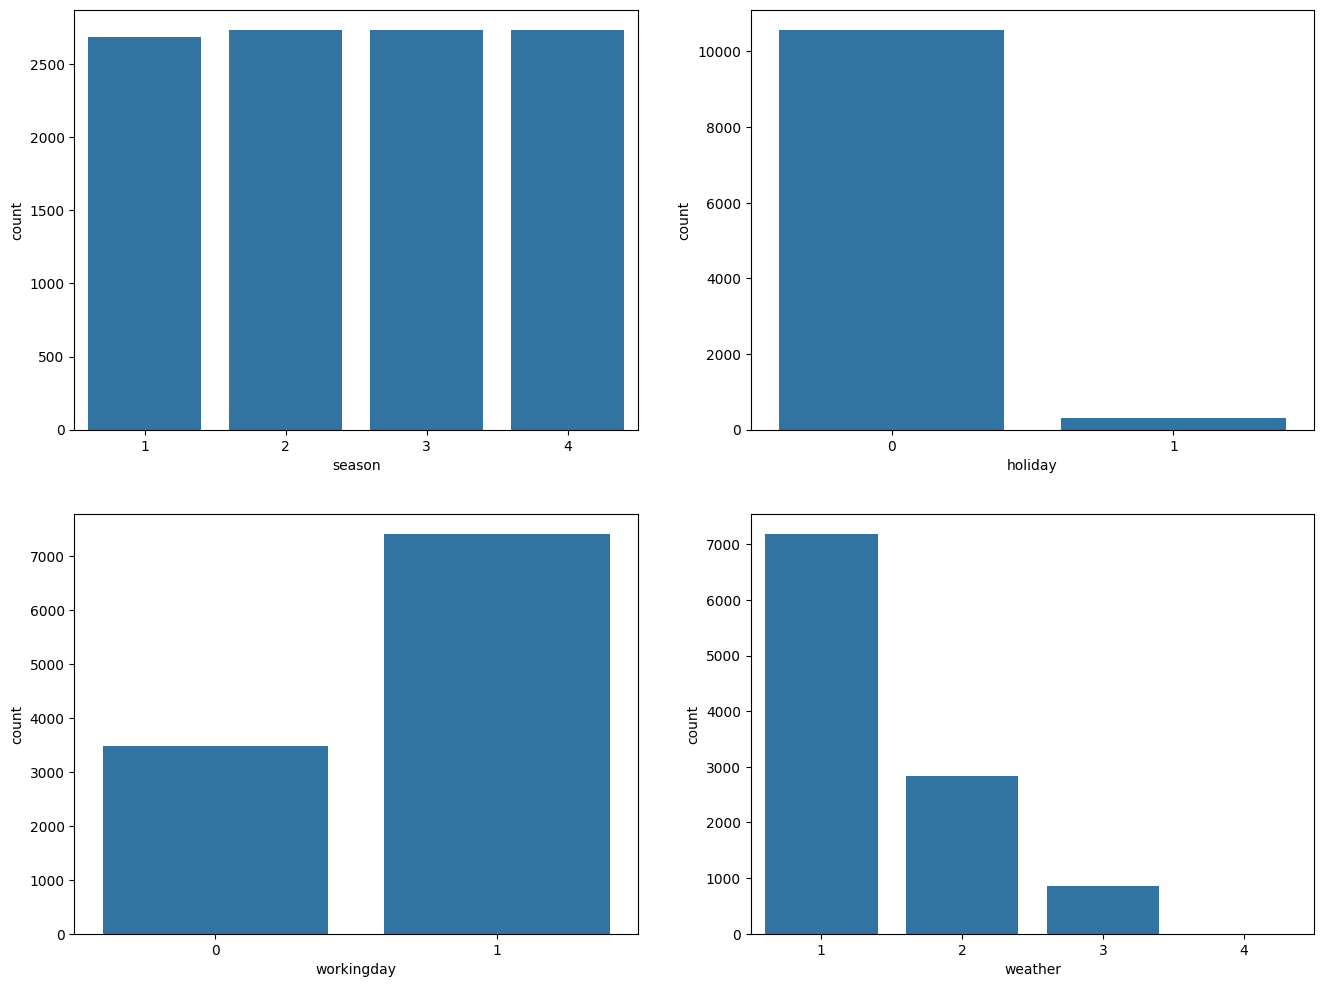

In [ ]:
 cat = ['season', 'holiday', 'workingday', 'weather']
 fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
 index = 0
 for row in range(2):
    for col in range(2):
        sns.countplot(x=df[cat[index]],data=df,ax=axis[row,col])
        index += 1
 plt.show()

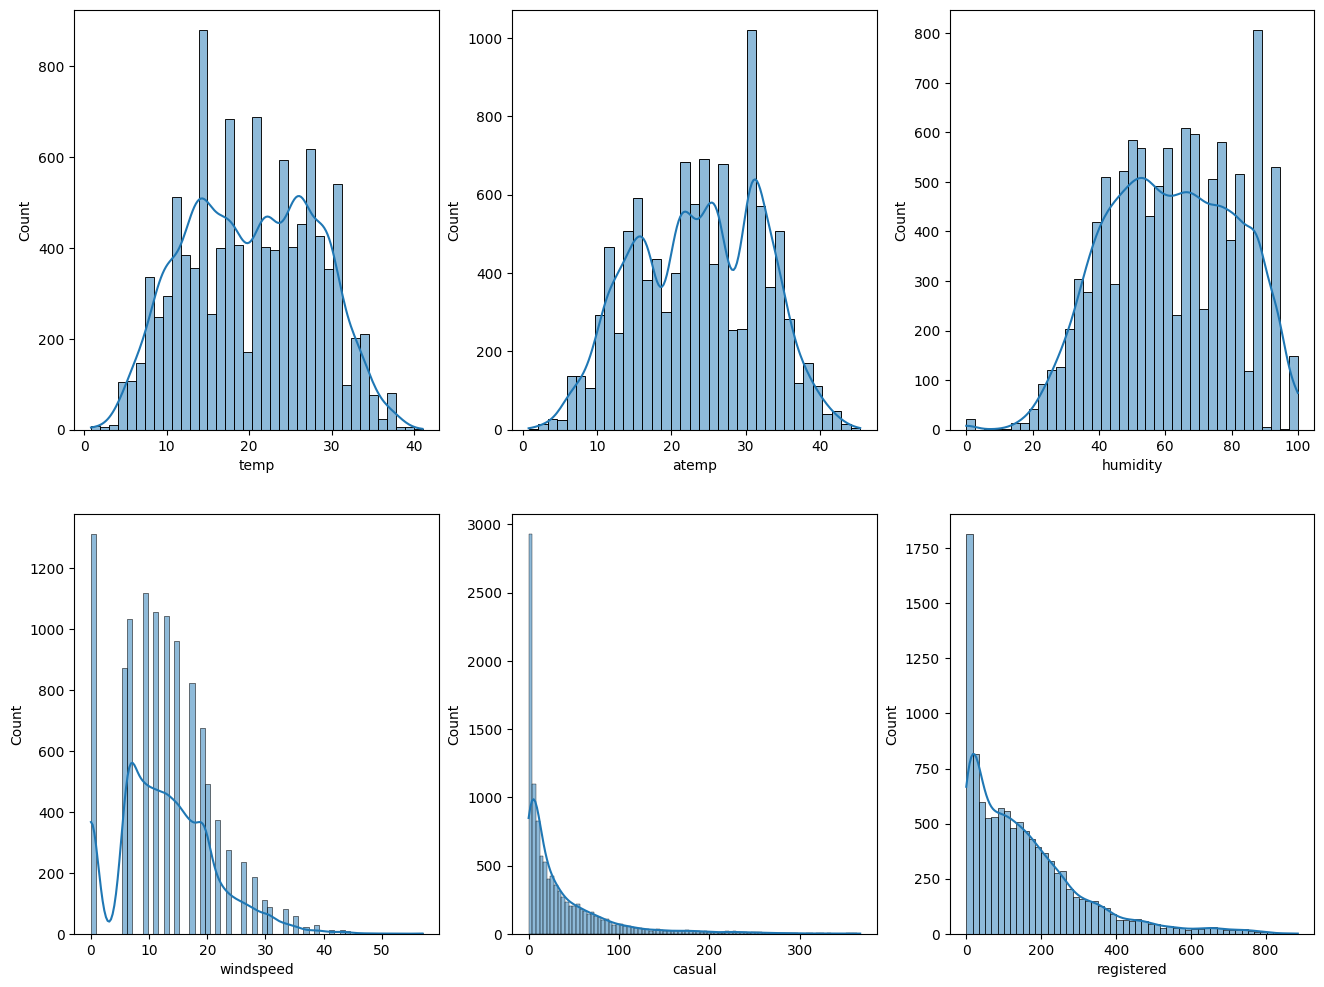

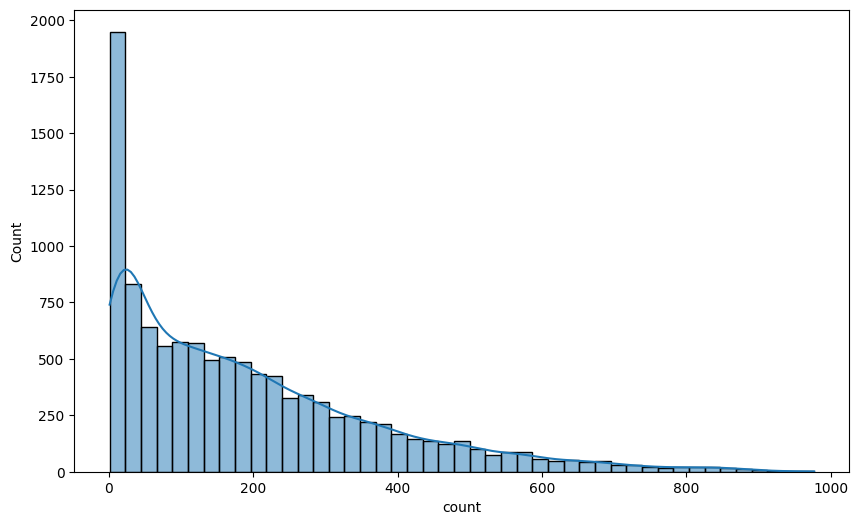

In [ ]:
 nums_cols = ['temp', 'atemp', 'humidity','windspeed','casual','registered','count']
 fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
 index = 0
 for row in range(2):
    for col in range(3):
        sns.histplot(df[nums_cols[index]], ax=axis[row, col], kde=True)
        index += 1
 plt.show()
 plt.figure(figsize=(10,6))
 sns.histplot(df[nums_cols[-1]],kde=True)
 plt.show()

**Insights:**
•	There is a seasonal impact on the number of rental bikes, with fall having highest number in fall followed by summer and winter. The lowest number is in Spring.
•	There is not a great impact of holiday or weekend compared to the number of bikes on working days.
•	There is clear impact of weather on the number of bikes with clear weather having most number of bikes rental and as weather gets worse number of bikes rented decreases.
•	Weather is also dependent on the seasons.
•	Humidity around 20 has good number of cycles getting rented as humidity increases the number of cycles used decreases.
•	For temperature as it rises from 5 degrees to 37 degrees you can see a rising trend of cycles rented. Though at higher temperatures of around 40 degree C the number reduces drastically.
•	There is also a monthly variation that can be observed in the number of bikes rented with months June,July, August having higher number and January ,February having low numbers.
•	From the yearly data from 2011 to 2012 we can see around 65% increase in the number of cycles rented.
•	Only at very high windspeed above 50 there seems to a decline in cycles otherwise windspeed does not significantly affect the rental numbers.

**Recommendations:**
•	Marketing according to seasonal changes. Since we know there a significant dependency of number of bikes based on season, we can aim to maximize revenue during seasons of fall and summer. So accordingly create more promotions and events around the time.
•	Promote the health benefits and impact on environment and give promotion to use cycles throughout the year.
•	Since India has moderate changes of temperatures in certain regions they can do a seasonality and temperature and weather based study for different regions of India and understand where the most favourable conditions exist for the maximum time throughout the year. Such places can be chosen for greater expansion since the usability is for greater duration.
•	Can provide loyalty programs for their registered users to encourage repeat usage.
•	Can provide bundled offers to get attract more customers during unfavourable weather like provide jackets during rainy weather or cap umbrellas during hot weather.

